# LAB0 : Data Analysis 

## Problem 1

In [36]:
# The following is an example solution using different values from those provided in the lab. You may use this code as a reference or write your own implementation.

import math
# This library allows you to use "pi" in your calculations by referencing it as math.pi.
# Example: Calculate the area of a circle using the formula area = math.pi * radius ** 2.

# Given data
load_mass = 8000  # Load mass in kilograms
gravity = 9.81  # Acceleration due to gravity in m/s^2
force = load_mass * gravity  # Force applied on the bar in Newtons (N)

diameter = 0.03  # Diameter of the bar in meters (30 mm = 0.03 m)
radius = diameter / 2  # Radius of the bar in meters
area = math.pi * (radius ** 2)  # Cross-sectional area of the bar in square meters (πr^2)

youngs_modulus = 210 * 10**9  # Young's Modulus of the material in Pascals (Pa)

# Calculations
stress = force / area  # Stress in Pascals (N/m^2), calculated as Force / Area
strain = stress / youngs_modulus  # Strain (unitless), calculated as Stress / Young's Modulus

# Convert stress to MPa (1 Pa = 10^-6 MPa)
stress_mpa = stress / 10**6

# Output 1. strees in MPa and 2. formatted strain (6 digits after decimal)
print(f"Stress: {stress_mpa:.2f} MPa")
print(f"Strain: {strain:.6f}")

## Problem 2

In [38]:
# The following is an example solution using different values from those provided in the lab. You may use this code as a reference or write your own implementation.

# Define the function to calculate deflection
def calculate_deflection(P, L, E, I):
    # Deflection formula: delta = (P * L^3) / (48 * E * I)
    delta = (P * L**3) / (48 * E * I)
    
    # Safety limit check
    if delta > 0.014:
        print(f"Warning: Deflection of {delta:.4f} meters exceeds the safety limit!")
    else:
        print(f"Deflection of {delta:.4f} meters is within safe limits.")
    
    return delta

# Given values
P = 8000  # Load in Newtons
L = 4  # Length of the beam in meters
E = 1.8 * 10**11  # Young's Modulus in Pascals for Steel
I = 6.5 * 10**-6  # Moment of inertia in meters^4

# Call the function to calculate deflection
calculate_deflection(P, L, E, I)

## Problem 3

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Step a) Import the data from the CSV file
data = pd.read_csv('Lab0data1.csv')  

# Extract the columns
force = data['force']  # Force in Newtons
area = data['area']  # Cross-sectional area in square meters
elongation = data['elongation']  # Elongation in meters

# Step b) Calculate stress and strain
stress = force / area  # Stress = Force / Area (in Pascals, Pa)

# Assume original length (L0) for strain calculation (50 mm = 0.05 meters)
L0 = 0.05  # Original length in meters
strain = elongation / L0  # Strain = Elongation / Original Length

# Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
plt.plot(strain, stress, label='Stress vs Strain', color='b', marker='o') # Plot the data

# Add labels and title
plt.xlabel('Strain (dimensionless)', fontsize=12)
plt.ylabel('Stress (Pa)', fontsize=12)
plt.title('Stress vs Strain from Tensile Test Data', fontsize=14)
plt.grid(True) # Add grid lines to make the plot easier to read
plt.legend() # Show a legend to indicate what the plot represents

# Show the plot
plt.show()

## Problem 4 : Tensile Test Analysis

In [42]:
#Import the data from the CSV file, Colomn 1 contains elongation, Colomn 2 contains force
Data1 = pd.read_csv('Lab0data2.csv', header=None)  
Data1.head()

#Process Data
Height = 22400 
Area = 1
Data1['Strain'] = Data1[1]/Height
Data1['Stress'] = Data1[2]/Area

#Plot Data
fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(Data1['Strain'],Data1['Stress'],'.-',label=('Raw Data'))
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)')
ax.legend()
plt.title('Stress vs Strain from Tensile Test Data', fontsize=10)
ax.set_xlim(left=0, right=0.1)
ax.set_ylim(bottom=-0.1, top=2.5)

In [44]:
#Find Elastic Modulus
import numpy as np

# Visual identification of the elastic zone
elastic_start = 0.01   # Replace this value by the lower elastic strain value
elastic_stop = 0.06    # Replace this value by the higher elastic strain value

# Filter the data for the elastic region
elastic_region = (Data1['Strain'] >= elastic_start) & (Data1['Strain'] <= elastic_stop)
Stress_elastic = Data1['Stress'][elastic_region]
Strain_elastic = Data1['Strain'][elastic_region]

# Perform a linear fit on the elastic region to determine the slope (Elastic Modulus) and y-intercept
m, b = np.polyfit(Strain_elastic, Stress_elastic, 1)  # Degree 1 for linear fit
mFit = [(m, b)]  # Store the slope (m) and intercept (b) as a tuple

# Display the linear fit results
print(f"Young Modulus (E): {m:.2f} MPa")
print(f"Y-intercept of the fit: {b:.2f}")

In [46]:
# Yield Strength Calculation
eOff = 0.001   # Replace this value by the strain offset for yield strength using the 0.2% offset method

# Apply the offset to the strain values to create the offset line
mXOff = [strain + eOff for strain in Data1['Strain']]  # Offset strain values

# Initialize a list to store the index of the yield point
yP = []

# Use the linear fit parameters (slope and intercept) from the elastic region
m = mFit[0][0]  # Slope of the linear fit (Elastic Modulus)
b = mFit[0][1]  # Y-intercept of the linear fit

# Find the yield point:
# The yield point is where the stress-strain curve deviates from the offset line
yield_index = next(  # Get the first index where the deviation condition is met
    (i for i, (stress, strain) in enumerate(zip(Data1['Stress'], Data1['Strain']))
     if stress < m * (strain - eOff) + b), None  # Offset line equation: y = m * (x - eOff) + b
    )

# Append the yield point index to the list
if yield_index is not None:
    yP.append(yield_index)
    # Print the stress value at the yield point
    print(f"Yield Strength: {Data1['Stress'][yP[-1]]:.2f} MPa")
else:
    print("No yield point found in the data.")

In [47]:
# Create a figure for the plot with specified size and resolution
fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca() # Create an axis object for plotting

# Plot the raw stress-strain data using dashed lines ('--') and label as 'Test Data'
ax.plot(Data1['Strain'],Data1['Stress'],'--',label=('Test Data'))    

# Plot the linear fit for the elastic region (Elastic Fit Line)
# 'm' is the slope and 'b' is the intercept from the linear fit (calculated earlier)
# The line represents the linear elastic behavior of the material
ax.plot(Data1['Strain'], m * Data1['Strain'] + b, '--', label='Elastic Fit Line')

# Apply the 0.2% offset method to create the offset line
mXOff = Data1['Strain'] + 0.002 
mYOff = m * mXOff + b # Calculate corresponding stress values using the offset

# Plot the 0.2% offset line (dashed line) with label '0.2% Offset Line'
ax.plot(mXOff, m * Data1['Strain'] + b, '--', label='0.2% Offset Line')

# Highlight the yield point on the graph with a red marker ('ro') at the given index yP[0]
ax.plot(Data1['Strain'][yP[0]],Data1['Stress'][yP[0]],'ro',ms=10)
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)')
ax.legend()
ax.set_xlim(left=0, right=0.2)
ax.set_ylim(bottom=-0.1, top=2.5)


## Coding Mistakes Problem (Optional)

In [17]:
# Mechanics of Materials: Beam Deflection Calculation

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining the deflection function for a simply supported beam with a central load
def beam_deflection(length, load, modulus, moment_of_inertia)
    """
    This function calculates the deflection at the center of a simply supported beam
    subjected to a central point load using the formula:
    deflection = (load * length^3) / (48 * modulus * moment_of_inertia)
    
    Parameters:
    length (float): Length of the beam (m)
    load (float): Central load applied (N)
    modulus (float): Young's Modulus of the material (Pa)
    moment_of_inertia (float): Moment of inertia of the beam cross-section (m^4)
    
    Returns:
    float: Deflection at the center of the beam (m)
    """
    return (load * length ** 3) / (48 * modulus * moment_of_inertia

# Example values (these might not be realistic, just for demonstration)
length = 4.0  # Length of the beam in meters
load = 5000    # Load applied in Newtons
modulus = 2.1e11  # Young's modulus in Pascals (steel)
moment_of_inertia = 1.5e-6  # Moment of inertia in m^4

# Calculate deflection
deflection = beam_deflection(length, load, modulus, moment_of_inertia)
print(f"The deflection at the center of the beam is: {deflection} meters")

lengths = np.linspace(1, 10, 10)  # Lengths from 1 to 10 meters

# deflection calculation for each length
deflections = [beam_deflection(l, load, modulus, moment_of_inertia) for l in lenghts]  

# Plotting the deflection as a function of length for different loads
loads = np.array([5000, 10000, 15000, 20000])  # Different load values

plt.figure(figsize=(8, 6))
for load in loads:
    deflections = [beam_deflection(lengths, load, modulus, moment_of_inertia)] 
    
    # Logic issue: should be looped through all lengths for plotting
    plt.plot(lengths, deflections, label=f"Load = {load} N")  

plt.title("Beam Deflection vs Length for Different Loads")
plt.xlabel("Beam Length (m)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: expected ':' (1436401499.py, line 8)

## Corrected Code 

The deflection at the center of the beam is: 0.021164021164021163 meters


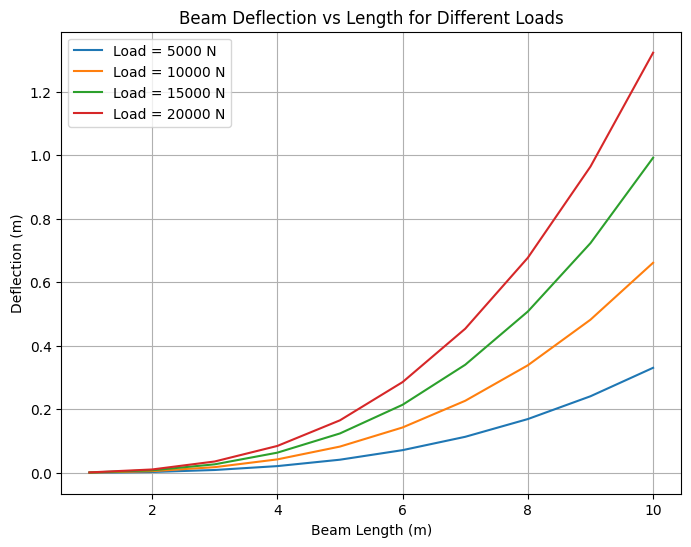

In [48]:
# Mechanics of Materials: Beam Deflection Calculation

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining the deflection function for a simply supported beam with a central load
def beam_deflection(length, load, modulus, moment_of_inertia):  # Fixed the missing :
    """
    This function calculates the deflection at the center of a simply supported beam
    subjected to a central point load using the formula:
    deflection = (load * length^3) / (48 * modulus * moment_of_inertia)
    
    Parameters:
    length (float): Length of the beam (m)
    load (float): Central load applied (N)
    modulus (float): Young's Modulus of the material (Pa)
    moment_of_inertia (float): Moment of inertia of the beam cross-section (m^4)
    
    Returns:
    float: Deflection at the center of the beam (m)
    """
    return (load * length ** 3) / (48 * modulus * moment_of_inertia)  # Fixed the missing )

# Example values (these might not be realistic, just for demonstration)
length = 4.0  # Length of the beam in meters
load = 5000    # Load applied in Newtons
modulus = 2.1e11  # Young's modulus in Pascals (steel)
moment_of_inertia = 1.5e-6  # Moment of inertia in m^4

# Calculate deflection
deflection = beam_deflection(length, load, modulus, moment_of_inertia)
print(f"The deflection at the center of the beam is: {deflection} meters")

# Correcting the typo in variable name (lengths instead of lenghts)
lengths = np.linspace(1, 10, 10)  # Lengths from 1 to 10 meters

# Now we calculate deflections for each length properly
deflections = [beam_deflection(l, load, modulus, moment_of_inertia) for l in lengths]  # Fixed the typo in lengths

# Plotting the deflection as a function of length for different loads
loads = np.array([5000, 10000, 15000, 20000])  # Different load values

plt.figure(figsize=(8, 6))
for load in loads:
    # Recalculating deflections for each load in the loop
    deflections = [beam_deflection(l, load, modulus, moment_of_inertia) for l in lengths]  # Mistake: This should be inside a loop for each load ## Corrected logic to recalculate deflection for each load
    
    # Now plotting the deflection for each load
    plt.plot(lengths, deflections, label=f"Load = {load} N")

plt.title("Beam Deflection vs Length for Different Loads")
plt.xlabel("Beam Length (m)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.show()